# Poder predictivo de los modelos en el set de datos de pulmón

Predicción de los datos a partir del ajuste de un conjunto de datos n = 5 para el ratón 2.

In [21]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
import math as m
import pandas as pd
from scipy.optimize import least_squares
np.seterr(all='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [22]:
df = pd.read_csv('lung_vol_data.txt', delimiter = "\t")
raton2 = df.loc[df['ID'] == 2]
raton2.to_csv('raton2_pulmon.txt', header=False, sep='\t', mode='w')

In [23]:
n_2, ID_2, x2, y2 = np.loadtxt("raton2_pulmon.txt",delimiter="\t", unpack=True)
x_a = x2[0:5]
y_a = y2[0:5]

In [24]:
x_p = x2[4:]
y_p = y2[4:]

### Modelo Exponencial $V_0 = 1 mm^3$

#### Estimación de los parámetros para n = 5

In [25]:
def exponencial_1(p,t):
    return (1*np.exp(p[0]*t))

param_list = []

def residuos(p,t,y):
    y_modelo = exponencial_1(p,t)
    param_list.append(p)
    return y_modelo - y

parametros_iniciales =[1,1] 

resE1 = least_squares(residuos, parametros_iniciales, args=(x_a,y_a), verbose=1)
print('-------------------------------')
print('Parámetros estimados:')
pV1 = []
for i,param in enumerate(resE1.x):
    print('parámetro[{:d}]: {:5.3f}'.format(i,param))
    pV1.append(param)
print('-------------------------------')
print('')

`ftol` termination condition is satisfied.
Function evaluations 32, initial cost 1.1263e+11, final cost 1.2145e+04, first-order optimality 1.33e+01.
-------------------------------
Parámetros estimados:
parámetro[0]: 0.477
parámetro[1]: 1.000
-------------------------------



#### Predicción

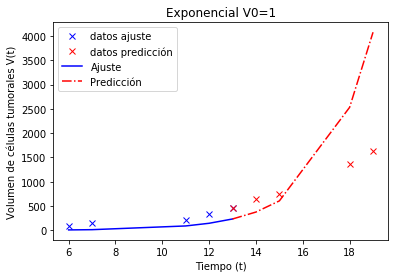

In [26]:
def exponencial_1(p,t):
    return (p[0]*np.exp(p[0]*t))

# plot datos experimentales del ratón 2
plt.plot(x_a,y_a, 'x', color = 'blue', label = 'datos ajuste')
plt.plot(x_p,y_p, 'x', color = 'red', label = 'datos predicción')

# plot ajuste de los 5 primeros datos
y_ajuste = exponencial_1(pV1,x_a)
plt.plot(x_a, y_ajuste, 'r-', color = 'blue', label = 'Ajuste')

#plot predicción
y_prediccion = exponencial_1(pV1,x_p)
plt.plot(x_p,y_prediccion, '-.', color = 'red', label = 'Predicción')


plt.xlabel("Tiempo (t)")
plt.ylabel("Volumen de células tumorales V(t)")
plt.legend(loc='best')
plt.title('Exponencial V0=1')
plt.savefig('predictivo_EV1_pulmon.jpg')
plt.show()

### Modelo Exponencial $V_0$

#### Estimación de los parámetros para n = 5

In [27]:
def exponencial(p,t):
    return (p[0]*np.exp(p[1]*t))

param_list = []

def residuos(p,t,y):
    y_modelo = exponencial(p,t)
    param_list.append(p)
    return y_modelo - y

parametros_iniciales =[1,1] 

resEV1 = least_squares(residuos, parametros_iniciales, args=(x_a,y_a), verbose=1)
print('-------------------------------')
print('Parámetros estimados:')
pEV = []
for i,param in enumerate(resEV1.x):
    print('parámetro[{:d}]: {:5.3f}'.format(i,param))
    pEV.append(param)
print('-------------------------------')
print('')

`ftol` termination condition is satisfied.
Function evaluations 35, initial cost 1.1263e+11, final cost 3.0445e+03, first-order optimality 1.83e-01.
-------------------------------
Parámetros estimados:
parámetro[0]: 22.159
parámetro[1]: 0.228
-------------------------------



#### Predicción

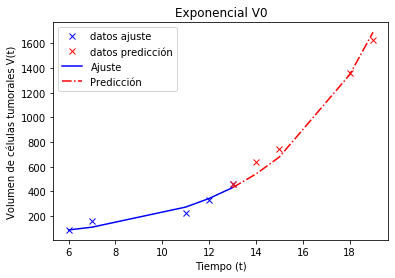

In [28]:
def exponencial(p,t):
    return (p[0]*np.exp(p[1]*t))

# plot datos experimentales del ratón 2
plt.plot(x_a,y_a, 'x', color = 'blue', label = 'datos ajuste')
plt.plot(x_p,y_p, 'x', color = 'red', label = 'datos predicción')

# plot ajuste de los 5 primeros datos
y_ajuste = exponencial(pEV,x_a)
plt.plot(x_a, y_ajuste, 'r-', color = 'blue', label = 'Ajuste')

#plot predicción
y_prediccion = exponencial(pEV,x_p)
plt.plot(x_p,y_prediccion, '-.', color = 'red', label = 'Predicción')


plt.xlabel("Tiempo (t)")
plt.ylabel("Volumen de células tumorales V(t)")
plt.legend(loc='best')
plt.title('Exponencial V0')
plt.savefig('predictivo_EV0_pulmon.jpg')
plt.show()

### Modelo Exponencial - lineal

#### Estimación de los parámetros para n = 5

In [29]:
def lineal(p,t):
    return p[1]*t+1

param_listL = []


def residuosL(p,t,y):
    param_listL.append(p)
    y_modelo = lineal(p,t)
    return y_modelo - y

parametros_inicialesL =[1,1]

resL = least_squares(residuosL, parametros_inicialesL, args=(x_a,y_a), verbose=1)


#########

def exp(p,t):
    return (1*np.exp(p[0]*t))

param_listE = []

def residuosE(p,t,y):
    param_listE.append(p)
    y_modelo = exp(p,t)
    return y_modelo - y

parametros_inicialesE =[1,1]

resE = least_squares(residuosE, parametros_inicialesE, args=(x_a,y_a), verbose=1)

pL = []
for i,param in enumerate(resL.x):
    print('parámetro[{:d}]: {:5.3f}'.format(i,param))
    pL.append(param)
print('-------------------------------')
print('')

pEx = []
for i,param in enumerate(resE.x):
    print('parámetro[{:d}]: {:5.3f}'.format(i,param))
    pEx.append(param)
print('-------------------------------')
print('')
pEL = []
pEL.append(pEx[0])
pEL.append(pL[1])

`ftol` termination condition is satisfied.
Function evaluations 24, initial cost 1.8607e+05, final cost 1.2153e+04, first-order optimality 1.59e-01.
`ftol` termination condition is satisfied.
Function evaluations 32, initial cost 1.1263e+11, final cost 1.2145e+04, first-order optimality 1.33e+01.
parámetro[0]: 1.000
parámetro[1]: 26.889
-------------------------------

parámetro[0]: 0.477
parámetro[1]: 1.000
-------------------------------



#### Predicción

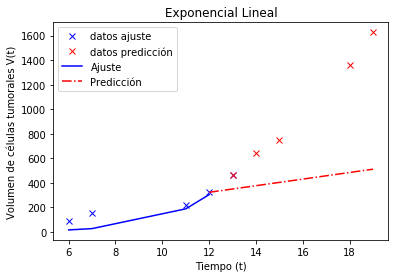

In [30]:
x_ar = x2[0:4]
y_ar = y2[0:4]
x_pr = x2[3:]
y_pr = y2[3:]

def lineal(p,t):
    return p[1]*t+1

def exp(p,t):
    return (1*np.exp(p[0]*t))

# plot datos experimentales del ratón 2
plt.plot(x_a,y_a, 'x', color = 'blue', label = 'datos ajuste')
plt.plot(x_p,y_p, 'x', color = 'red', label = 'datos predicción')


# plot ajuste de los 5 primeros datos
y_ajuste = exp(pEL,x_ar)
plt.plot(x_ar, y_ajuste, 'r-', color = 'blue', label = 'Ajuste')



#plot predicción
y_prediccion = lineal(pEL,x_pr)
plt.plot(x_pr,y_prediccion, '-.', color = 'red', label = 'Predicción')



plt.xlabel("Tiempo (t)")
plt.ylabel("Volumen de células tumorales V(t)")
plt.legend(loc='best')
plt.title('Exponencial Lineal')
plt.savefig('predictivo_EL_pulmon.jpg')
plt.show()

### Modelo Logístico

#### Estimación de los parámetros para n = 5

In [31]:
def modelo_logistico(p,t):
    return (p[1]*1*np.exp(p[0]*t))/(p[1]+1*np.exp(p[0]*t)-1)

param_list = []

def residuos(p,t,y):
    y_modelo = modelo_logistico(p,t)
    param_list.append(p)
    return y_modelo - y

parametros_iniciales =[1,1] 

resLOG = least_squares(residuos, parametros_iniciales, args=(x_a,y_a), verbose=1)
print('-------------------------------')
print('Parámetros estimados:')
pLOG = []
for i,param in enumerate(resLOG.x):
    print('parámetro[{:d}]: {:5.3f}'.format(i,param))
    pLOG.append(param)
print('-------------------------------')

`ftol` termination condition is satisfied.
Function evaluations 44, initial cost 1.9977e+05, final cost 9.5198e+03, first-order optimality 3.90e-01.
-------------------------------
Parámetros estimados:
parámetro[0]: 0.533
parámetro[1]: 793.350
-------------------------------


#### Predicción

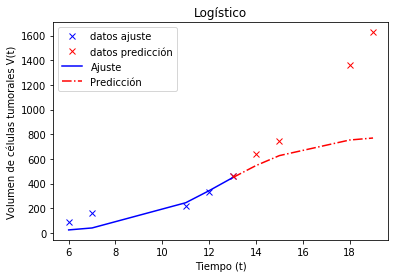

In [32]:
def modelo_logistico(p,t):
    return (p[1]*1*np.exp(p[0]*t))/(p[1]+1*np.exp(p[0]*t)-1)

# plot datos experimentales del ratón 2
plt.plot(x_a,y_a, 'x', color = 'blue', label = 'datos ajuste')
plt.plot(x_p,y_p, 'x', color = 'red', label = 'datos predicción')

# plot ajuste de los 5 primeros datos
y_ajuste = modelo_logistico(pLOG,x_a)
plt.plot(x_a, y_ajuste, 'r-', color = 'blue', label = 'Ajuste')

#plot predicción
y_prediccion = modelo_logistico(pLOG,x_p)
plt.plot(x_p,y_prediccion, '-.', color = 'red', label = 'Predicción')


plt.xlabel("Tiempo (t)")
plt.ylabel("Volumen de células tumorales V(t)")
plt.legend(loc='best')
plt.title('Logístico')
plt.savefig('predictivo_L_pulmon.jpg')
plt.show()

### Modelo Logístico Generalizado

#### Estimación de los parámetros para n = 5

In [33]:
def modelo_lgeneralizado(p,t):
    return((p[2])/((1**p[1]+(p[2]**p[1]-1**p[1])*np.exp(-p[0]*p[1]*t))**(1/p[1])))

param_list = []

def residuos(p,t,y):
    y_modelo = modelo_lgeneralizado(p,t)
    param_list.append(p)
    return y_modelo - y

parametros_iniciales =[1,1,2] 

resGEN = least_squares(residuos, parametros_iniciales, args=(x_a,y_a), verbose=1)
print('-------------------------------')
print('Parámetros estimados:')
pGEN = []
for i,param in enumerate(resGEN.x):
    print('parámetro[{:d}]: {:5.3f}'.format(i,param))
    pGEN.append(param)
print('-------------------------------')

The maximum number of function evaluations is exceeded.
Function evaluations 300, initial cost 1.9852e+05, final cost 6.0257e+03, first-order optimality 2.84e+05.
-------------------------------
Parámetros estimados:
parámetro[0]: 296.656
parámetro[1]: 0.000
parámetro[2]: 1333.713
-------------------------------


#### Predicción

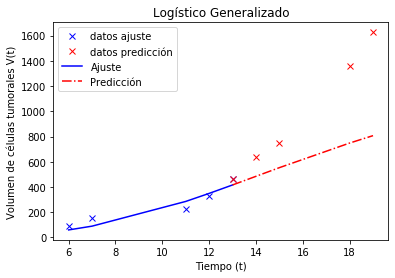

In [34]:
def modelo_lgeneralizado(p,t):
    return((p[2])/((1**p[1]+(p[2]**p[1]-1**p[1])*np.exp(-p[0]*p[1]*t))**(1/p[1])))

# plot datos experimentales del ratón 2
plt.plot(x_a,y_a, 'x', color = 'blue', label = 'datos ajuste')
plt.plot(x_p,y_p, 'x', color = 'red', label = 'datos predicción')

# plot ajuste de los 5 primeros datos
y_ajuste = modelo_lgeneralizado(pGEN,x_a)
plt.plot(x_a, y_ajuste, 'r-', color = 'blue', label = 'Ajuste')

#plot predicción
y_prediccion = modelo_lgeneralizado(pGEN,x_p)
plt.plot(x_p,y_prediccion, '-.', color = 'red', label = 'Predicción')


plt.xlabel("Tiempo (t)")
plt.ylabel("Volumen de células tumorales V(t)")
plt.legend(loc='best')
plt.title('Logístico Generalizado')
plt.savefig('predictivo_LG_pulmon.jpg')
plt.show()

### Modelo Gompertz

#### Estimación de los parámetros para n = 5

In [35]:
def modelo_gompertz(p,t):
    return (1*np.exp((p[0]/p[1])*(1-np.exp(-p[1]*t))))

param_listG = []

def residuos(p,t,y):
    y_modelo = modelo_gompertz(p,t)
    param_listG.append(p)
    return y_modelo - y

parametros_iniciales =[1,1] 

resG = least_squares(residuos, parametros_iniciales, args=(x_a,y_a), verbose=1)
print('-------------------------------')
print('Parámetros estimados:')
pG = []
for i,param in enumerate(resG.x):
    print('parámetro[{:d}]: {:5.3f}'.format(i,param))
    pG.append(param)
print('-------------------------------')

`ftol` termination condition is satisfied.
Function evaluations 24, initial cost 1.9763e+05, final cost 6.0235e+03, first-order optimality 5.95e+00.
-------------------------------
Parámetros estimados:
parámetro[0]: 1.008
parámetro[1]: 0.140
-------------------------------


#### Predicción

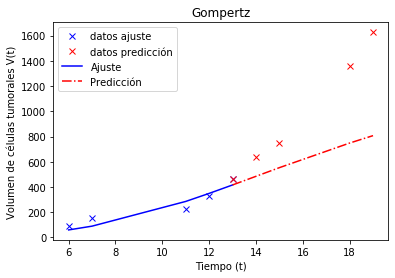

In [36]:
def modelo_gompertz(p,t):
    return (1*np.exp((p[0]/p[1])*(1-np.exp(-p[1]*t))))

# plot datos experimentales del ratón 2
plt.plot(x_a,y_a, 'x', color = 'blue', label = 'datos ajuste')
plt.plot(x_p,y_p, 'x', color = 'red', label = 'datos predicción')

# plot ajuste de los 5 primeros datos
y_ajuste = modelo_gompertz(pG,x_a)
plt.plot(x_a, y_ajuste, 'r-', color = 'blue', label = 'Ajuste')

#plot predicción
y_prediccion = modelo_gompertz(pG,x_p)
plt.plot(x_p,y_prediccion, '-.', color = 'red', label = 'Predicción')


plt.xlabel("Tiempo (t)")
plt.ylabel("Volumen de células tumorales V(t)")
plt.legend(loc='best')
plt.title('Gompertz')
plt.savefig('predictivo_G_pulmon.jpg')
plt.show()

### Modelo Von Bertalanffy

#### Estimación de los parámetros para n = 5

In [37]:
def modelo_Bertalanffy(p,t):
    return ((p[0]/p[1])+(1**(1-p[2])-(p[0]/p[1]))*np.exp((-p[1])*t*(1-p[2])))**(1/(1-p[2]))

param_list = []

def residuos(p,t,y):
    y_modelo = modelo_Bertalanffy(p,t)
    param_list.append(p)
    return y_modelo - y

parametros_iniciales =[1,1,0.9] 

resVB1 = least_squares(residuos, parametros_iniciales, args=(x_a,y_a), verbose=1)
print('-------------------------------')
print('Parámetros estimados:')
pVB = []
for i,param in enumerate(resVB1.x):
    print('parámetro[{:d}]: {:5.3f}'.format(i,param))
    pVB.append(param)
print('-------------------------------')

The maximum number of function evaluations is exceeded.
Function evaluations 300, initial cost 1.9977e+05, final cost 3.0448e+03, first-order optimality 2.03e+02.
-------------------------------
Parámetros estimados:
parámetro[0]: 1296549.998
parámetro[1]: -0.228
parámetro[2]: -4.020
-------------------------------


#### Predicción

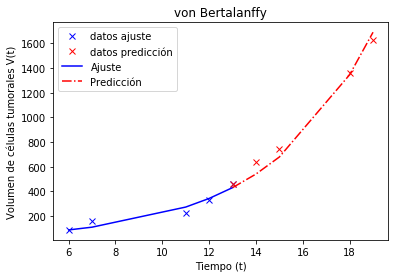

In [38]:
def modelo_Bertalanffy(p,t):
    return ((p[0]/p[1])+(1**(1-p[2])-(p[0]/p[1]))*np.exp((-p[1])*t*(1-p[2])))**(1/(1-p[2]))

# plot datos experimentales del ratón 2
plt.plot(x_a,y_a, 'x', color = 'blue', label = 'datos ajuste')
plt.plot(x_p,y_p, 'x', color = 'red', label = 'datos predicción')

# plot ajuste de los 5 primeros datos
y_ajuste = modelo_Bertalanffy(pVB,x_a)
plt.plot(x_a, y_ajuste, 'r-', color = 'blue', label = 'Ajuste')

#plot predicción
y_prediccion = modelo_Bertalanffy(pVB,x_p)
plt.plot(x_p,y_prediccion, '-.', color = 'red', label = 'Predicción')


plt.xlabel("Tiempo (t)")
plt.ylabel("Volumen de células tumorales V(t)")
plt.legend(loc='best')
plt.title('von Bertalanffy')
plt.savefig('predictivo_VB_pulmon.jpg')
plt.show()

### Modelo Power Law

#### Estimación de los parámetros para n = 5

In [39]:
def modelo_Power_law(p,t):
    return ((p[0]*(1**(1-p[0]))-(1**(1-p[0]))-p[1]*t*(p[0]-1)**2)/(p[0]-1))**(-1/(p[0]-1))

param_list = []

def residuos(p,t,y):
    y_modelo = modelo_Power_law(p,t)
    param_list.append(p)
    return y_modelo - y

parametros_iniciales =[0.9,1] 

resVB1 = least_squares(residuos, parametros_iniciales, args=(x_a,y_a), verbose=1)
print('-------------------------------')
print('Parámetros estimados:')
pVB = []
for i,param in enumerate(resVB1.x):
    print('parámetro[{:d}]: {:5.3f}'.format(i,param))
    pVB.append(param)
print('-------------------------------')

`ftol` termination condition is satisfied.
Function evaluations 19, initial cost 1.0534e+07, final cost 4.6081e+03, first-order optimality 4.54e-01.
-------------------------------
Parámetros estimados:
parámetro[0]: 0.599
parámetro[1]: 1.964
-------------------------------


#### Predicción

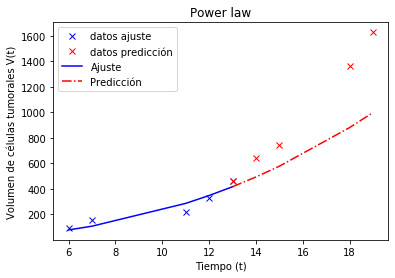

In [40]:
# plot datos experimentales del ratón 2
plt.plot(x_a,y_a, 'x', color = 'blue', label = 'datos ajuste')
plt.plot(x_p,y_p, 'x', color = 'red', label = 'datos predicción')

# plot ajuste de los 5 primeros datos
y_ajuste = modelo_Power_law(pVB,x_a)
plt.plot(x_a, y_ajuste, 'r-', color = 'blue', label = 'Ajuste')

#plot predicción
y_prediccion = modelo_Power_law(pVB,x_p)
plt.plot(x_p,y_prediccion, '-.', color = 'red', label = 'Predicción')


plt.xlabel("Tiempo (t)")
plt.ylabel("Volumen de células tumorales V(t)")
plt.legend(loc='best')
plt.title('Power law')
plt.savefig('predictivo_PwL_pulmon.jpg')
plt.show()